In [12]:
import pandas as pd
import numpy as np


In [13]:
def preprocessing():
    df = pd.read_csv(r'C:\Users\Мирослав\Documents\NLP_Tutorial\NLP_COURSE\UPDATED_NLP_COURSE\TextFiles\moviereviews.tsv', sep='\t')
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)
    blanks = []
    for i,lb,rv in df.itertuples():
        if type(rv)==str:
            # If rows is space it needed to remove
            if rv.isspace():
                blanks.append(i)
    df.drop(blanks, inplace=True)
    print(df.shape)
    return df

In [14]:
df = preprocessing()

(2000, 2)
(1965, 2)
(1938, 2)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [16]:
df['label'].describe()

count     1938
unique       2
top        pos
freq       969
Name: label, dtype: object

In [17]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [18]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

<AxesSubplot:title={'center':'Positive or Negative target'}>

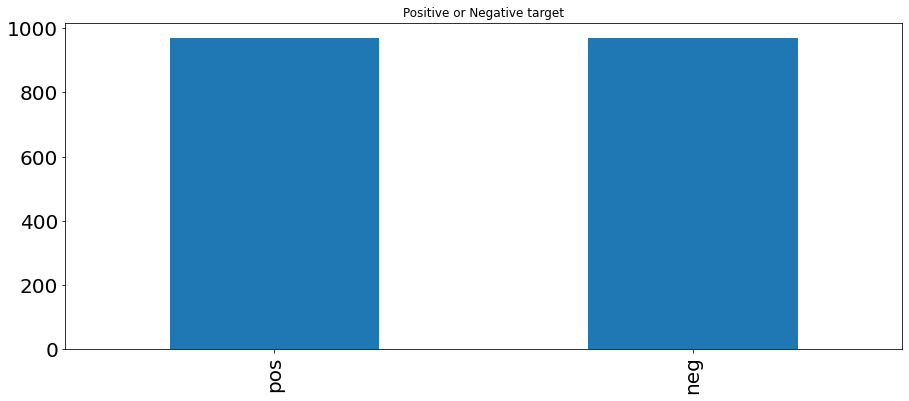

In [19]:
df['label'].value_counts().plot(kind='bar', figsize = (15, 6), fontsize = 20, title = 'Positive or Negative target')

# Build the Test and Train dataset 

In [20]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Implement some methods for predictions positive or negative movie's review

In [48]:
def implement_prediction_approaches(df):
    df_all_matrix_conf = pd.DataFrame()
    bag_of_predict = {}

    list_of_approaches = [LogisticRegression(), LinearSVC(),  MultinomialNB(), SVC(gamma='auto')]
    
    for approach in list_of_approaches:
        # Create x and y Series 
        X=df['review']
        y=df['label']
        
        label_name = str(approach).split('(')[0]
        # Split our datapoints in test and train 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        # create Pipeline 
        model = Pipeline([('tfidf', TfidfVectorizer()),
                         (f'{label_name}', approach,)])
        # Feed the training data through the pipeline
        model.fit(X_train, y_train)
        
        # compute predictions
        predictions = model.predict(X_test)
        print(f'Metrics for {label_name} \n', metrics.classification_report(y_test,predictions))
        print('===='*50)
        
        # make dataframe include confusion matrix 
        df_metrics = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['positive','negative'], columns=[f'positive {label_name}', f'negative {label_name}'])
        
        # add in dataframe accuracy score
        df_metrics[f'Accuracy {label_name}'] = metrics.accuracy_score(y_test,predictions)
        
        # concate dataframe with single matrix for all mrthods of ML classification
        df_all_matrix_conf = pd.concat([df_metrics, df_all_matrix_conf], axis = 1)
        
        # Test our model use positive and negative review
        example_review_neg = 'This movie seemed like a failure to me. From the point of view of the acting, there is a complete confusion and unwillingness to show true skill. The only good and wonderful moment was the appearance of Eliza at the end of the film.'
        example_review_pos = 'The film was ambiguous, but unlike many, I got tremendous pleasure from the film and from the acting.'
        
        # try predict positive or negative our review
        sample_of_predict = model.predict([example_review_pos])
        
        # add in dict our predictions result
#         bag_of_predict.append(sample_of_predict[0])
        bag_of_predict[label_name]=(metrics.accuracy_score(y_test,predictions), sample_of_predict[0])
        
        print(sample_of_predict)
    return df_all_matrix_conf, bag_of_predict
                          
                        

In [49]:
df_all_matrix_conf, bag_of_predict = implement_prediction_approaches(df)

Metrics for LogisticRegression 
               precision    recall  f1-score   support

         neg       0.81      0.83      0.82       308
         pos       0.84      0.82      0.83       332

    accuracy                           0.82       640
   macro avg       0.82      0.83      0.82       640
weighted avg       0.83      0.82      0.83       640

['pos']
Metrics for LinearSVC 
               precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640

['pos']
Metrics for MultinomialNB 
               precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

    accuracy                           0.76       640
   macro avg       0.80    

C:\Users\Мирослав\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Мирослав\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Мирослав\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [50]:
df_all_matrix_conf

,positive SVC,negative SVC,Accuracy SVC,positive MultinomialNB,negative MultinomialNB,Accuracy MultinomialNB,positive LinearSVC,negative LinearSVC,Accuracy LinearSVC,positive LogisticRegression,negative LogisticRegression,Accuracy LogisticRegression
positive,308,0,0.48125,287,21,0.764062,259,49,0.846875,257,51,0.825
negative,332,0,0.48125,130,202,0.764062,49,283,0.846875,61,271,0.825


In [51]:
bag_of_predict

{'LogisticRegression': (0.825, 'pos'),
 'LinearSVC': (0.846875, 'pos'),
 'MultinomialNB': (0.7640625, 'pos'),
 'SVC': (0.48125, 'neg')}